#  PCA Project: Dimensionality Reduction for Wine Classification
🎯 Problem Statement:
A wine quality control lab has data on various chemical properties of wines. We want to reduce the dimensionality of the data using PCA and visualize it while preserving as much variance as possible.

✅ What is PCA?
Principal Component Analysis is a linear dimensionality reduction technique that:

Converts correlated features into a smaller set of uncorrelated variables (Principal Components).

Helps in visualization, noise reduction, and speeding up ML algorithms.

In [1]:
# Load Dataset (Sklearn Wine Dataset)
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target
X.shape  # (178, 13)


(178, 13)

In [2]:
# Explore the Data
print(X.head())
print("Target Classes:", set(y))  # 3 classes of wine


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [3]:
#  Preprocessing
# PCA is sensitive to scale — we must scale features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Apply PCA
# We'll reduce from 13 → 2 dimensions for visualization.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


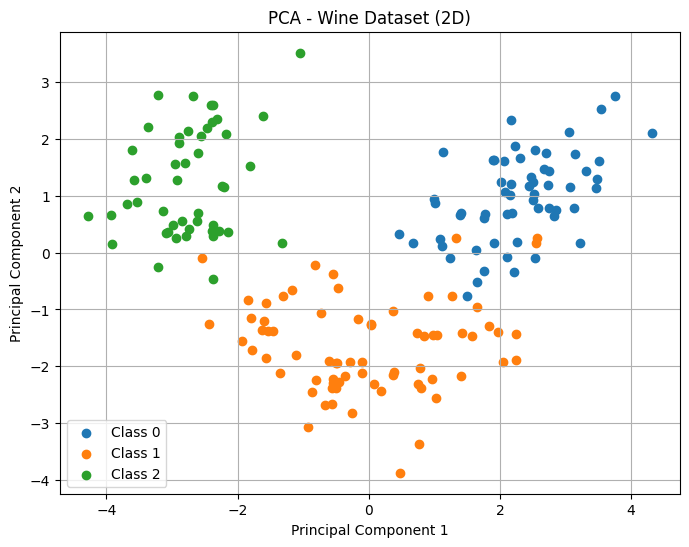

In [5]:
# Visualize PCA Components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, label in enumerate(set(y)):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Wine Dataset (2D)")
plt.legend()
plt.grid()
plt.show()



In [7]:
# Variance Explained
# You’ll typically see ~60–70% variance retained with 2 components.

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.36198848 0.1920749 ]
Total Variance Captured: 0.5540633835693526


In [8]:
# Optional: PCA for Model Training
# We can also train a classifier using the reduced features.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy on PCA-reduced data:", accuracy_score(y_test, y_pred))


Accuracy on PCA-reduced data: 1.0


| Pros                           | Why It’s Useful                          |
| ------------------------------ | ---------------------------------------- |
| 🎯 Reduces dimensionality      | Makes data simpler and faster to process |
| 📊 Removes multicollinearity   | Uncorrelated PCs = stable models         |
| 🎨 Enables 2D/3D visualization | Visualizes complex data easily           |
| 🚀 Boosts ML speed             | Especially in high dimensions            |




| Cons                             | Why It Can Hurt                           |
| -------------------------------- | ----------------------------------------- |
| ❌ Loss of interpretability       | PCs are combinations of original features |
| ⚠️ May discard useful info       | Especially if you keep too few PCs        |
| ❌ Only captures linear structure | Can’t capture non-linear relationships    |



Real-World Use Cases
🧬 Gene expression dimensionality reduction

🛒 Reducing customer features before clustering

🖼️ Image compression

🔍 Noise filtering in sensor data

🤖 Preprocessing before ML models



| Step              | Result                                       |
| ----------------- | -------------------------------------------- |
| Input Dimensions  | 13 (wine chemical features)                  |
| PCA Output        | 2 components                                 |
| Variance Captured | \~60–70%                                     |
| Application       | Visualization + Random Forest Classification |
